# CMPINF 2100: Supporting EDA
## Kathryn Lavelle-Myrtaj
### FPoliSolutions: Predictive Maintenance

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Read Data

In [2]:
# Read in the data from the .csv file
df = pd.read_csv('training_data.csv')

In [55]:
df

X01       X02       X03       X04       X05       X06       X07  \
0    -2.907070  1.266914 -0.332039 -0.248782  0.200432 -0.008683  0.316866   
1    -4.608052  4.672474  0.154697  0.268719 -0.842417  0.055191  0.622848   
2     4.338816  5.684974  1.868370 -1.883006  0.589758  0.932240 -0.646026   
3    -1.835062  0.427501 -2.226023  0.700375 -1.144850  1.188100  0.727831   
4    13.990969 -3.877269  1.921605  0.162288  2.316402 -0.161137 -0.099180   
..         ...       ...       ...       ...       ...       ...       ...   
218  -3.454719 -0.911378  1.072785  0.845129  1.817682 -0.034388 -0.394277   
219   0.493271  2.184699  0.107755 -1.852857  0.329977  0.679100  0.933463   
220  -5.009510 -0.488819  0.838883  0.615571  0.069954 -0.365945 -0.290072   
221  -2.665672 -0.546497 -0.545406 -0.477273  1.476238 -0.019403  0.280312   
222   0.055307 -1.709225 -0.763259 -0.755982 -0.106586 -1.174575 -0.608212   

          X08       X09       X10  ...       V21       V22       V23  \
0   -0.323924  0.030199 -0.205569  ...  0.552065  0.489846  1.113175   
1   -0.260097 -0.651079  1.096821  ...  1.989505  1.355984  1.656029   
2    0.183410  0.132287 -0.426386  ...  2.128248  2.553980  2.661607   
3   -0.271734  0.003246  0.138308  ... -0.856860 -0.766993 -0.882442   
4    0.514620 -0.551956 -0.517779  ... -0.333291  0.126656 -0.557930   
..        ...       ...       ...  ...       ...       ...       ...   
218 -0.260803  0.018067 -0.718457  ... -1.041533 -0.585809 -0.831599   
219  0.110013  0.234102 -0.080677  ...  1.599908  1.485953  1.326105   
220  0.777958 -0.392741  0.126245  ... -0.769891 -0.384573 -0.894474   
221  0.359992 -0.136810  0.116397  ... -0.092393 -0.962929 -0.580874   
222 -0.483285 -0.055759 -0.658711  ...  0.076693  0.434874  0.371620   

          V24       V25       V26       V27       V28         V29  Y  
0   -0.240931 -0.108875 -0.114766  0.841632  0.104236 -121.810994  1  
1    2.428749  1.068637  1.945175  0.950544  0.143290  -59.362086  1  
2    2.625942  4.462401  3.621299  0.992381  0.127803  -79.575912  1  
3   -0.832196 -0.377106 -0.633452  0.964183  0.088978 -139.426151  0  
4   -0.185135 -0.639549 -0.245234  0.845817  0.172305  -29.433234  1  
..        ...       ...       ...       ...       ...         ... ..  
218  0.315496 -2.098443 -0.767479  0.941532  0.112127 -100.512718  0  
219  0.738920  1.782694  1.221559  0.965555  0.098206 -118.299085  1  
220 -1.071848 -0.755456 -1.001084  0.898706  0.106729 -102.237684  1  
221 -0.750556 -1.618888 -1.083649  0.964139  0.096673 -119.015441  1  
222  0.947893  0.775466  0.472459  0.914727  0.137963  -78.872248  1  

[223 rows x 64 columns]

## Essential Data Exploration

In [4]:
# Display number of rows and columns
df.shape

(223, 64)

In [5]:
# Display column names and their data types
df.dtypes

X01    float64
X02    float64
X03    float64
X04    float64
X05    float64
        ...   
V26    float64
V27    float64
V28    float64
V29    float64
Y        int64
Length: 64, dtype: object

In [6]:
df.dtypes.value_counts()

float64    63
int64       1
Name: count, dtype: int64

In [7]:
# Dipslay the number of missing values for each column
df.isna().sum()

X01    0
X02    0
X03    0
X04    0
X05    0
      ..
V26    0
V27    0
V28    0
V29    0
Y      0
Length: 64, dtype: int64

In [57]:
# Display the number of unique values for each column
df.nunique()

X01    223
X02    223
X03    223
X04    223
X05    223
      ... 
V26    223
V27    223
V28    223
V29    223
Y        2
Length: 64, dtype: int64

In [9]:
df.nunique(dropna=True)

X01    223
X02    223
X03    223
X04    223
X05    223
      ... 
V26    223
V27    223
V28    223
V29    223
Y        2
Length: 64, dtype: int64

In [10]:
# Display the count for categorical variable `Y`
df.Y.value_counts()

Y
1    138
0     85
Name: count, dtype: int64

### Visualize Marginal Data

For exploration purposes, we will will treat the numeric column `Y` as a non-numeric, categorial variable since it has only two possible values: 0 or 1.

##### Categorical Variables: `Y`

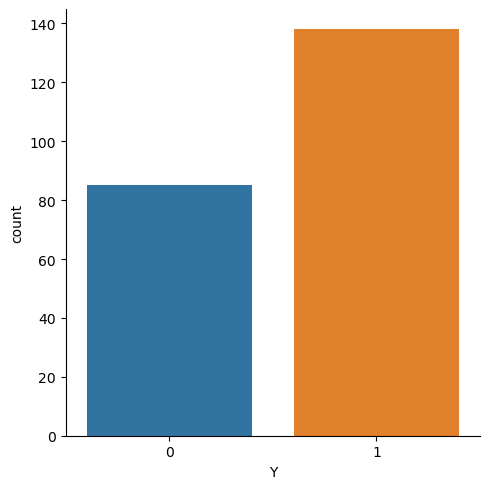

In [11]:
# Visualize output variable `Y` as a categorical variable
sns.catplot(data=df, x='Y', kind='count')

plt.show()

##### Continuous Variables: `X01 - X25`, `Z01 - Z09`, `V01 - V29`

In [12]:
# Create an object that contains just the input column names
input_names = df.drop(columns=['Y']).columns

In [14]:
# Create a DataFarme to hold the input variables
df_inputs = df.drop(columns=['Y']).copy()

In [15]:
df_inputs

X01       X02       X03       X04       X05       X06       X07  \
0    -2.907070  1.266914 -0.332039 -0.248782  0.200432 -0.008683  0.316866   
1    -4.608052  4.672474  0.154697  0.268719 -0.842417  0.055191  0.622848   
2     4.338816  5.684974  1.868370 -1.883006  0.589758  0.932240 -0.646026   
3    -1.835062  0.427501 -2.226023  0.700375 -1.144850  1.188100  0.727831   
4    13.990969 -3.877269  1.921605  0.162288  2.316402 -0.161137 -0.099180   
..         ...       ...       ...       ...       ...       ...       ...   
218  -3.454719 -0.911378  1.072785  0.845129  1.817682 -0.034388 -0.394277   
219   0.493271  2.184699  0.107755 -1.852857  0.329977  0.679100  0.933463   
220  -5.009510 -0.488819  0.838883  0.615571  0.069954 -0.365945 -0.290072   
221  -2.665672 -0.546497 -0.545406 -0.477273  1.476238 -0.019403  0.280312   
222   0.055307 -1.709225 -0.763259 -0.755982 -0.106586 -1.174575 -0.608212   

          X08       X09       X10  ...       V20       V21       V22  \
0   -0.323924  0.030199 -0.205569  ... -0.244893  0.552065  0.489846   
1   -0.260097 -0.651079  1.096821  ...  0.869478  1.989505  1.355984   
2    0.183410  0.132287 -0.426386  ...  2.300102  2.128248  2.553980   
3   -0.271734  0.003246  0.138308  ... -0.193914 -0.856860 -0.766993   
4    0.514620 -0.551956 -0.517779  ... -0.246222 -0.333291  0.126656   
..        ...       ...       ...  ...       ...       ...       ...   
218 -0.260803  0.018067 -0.718457  ... -0.545864 -1.041533 -0.585809   
219  0.110013  0.234102 -0.080677  ...  0.998048  1.599908  1.485953   
220  0.777958 -0.392741  0.126245  ... -0.419527 -0.769891 -0.384573   
221  0.359992 -0.136810  0.116397  ... -0.825147 -0.092393 -0.962929   
222 -0.483285 -0.055759 -0.658711  ... -0.273754  0.076693  0.434874   

          V23       V24       V25       V26       V27       V28         V29  
0    1.113175 -0.240931 -0.108875 -0.114766  0.841632  0.104236 -121.810994  
1    1.656029  2.428749  1.068637  1.945175  0.950544  0.143290  -59.362086  
2    2.661607  2.625942  4.462401  3.621299  0.992381  0.127803  -79.575912  
3   -0.882442 -0.832196 -0.377106 -0.633452  0.964183  0.088978 -139.426151  
4   -0.557930 -0.185135 -0.639549 -0.245234  0.845817  0.172305  -29.433234  
..        ...       ...       ...       ...       ...       ...         ...  
218 -0.831599  0.315496 -2.098443 -0.767479  0.941532  0.112127 -100.512718  
219  1.326105  0.738920  1.782694  1.221559  0.965555  0.098206 -118.299085  
220 -0.894474 -1.071848 -0.755456 -1.001084  0.898706  0.106729 -102.237684  
221 -0.580874 -0.750556 -1.618888 -1.083649  0.964139  0.096673 -119.015441  
222  0.371620  0.947893  0.775466  0.472459  0.914727  0.137963  -78.872248  

[223 rows x 63 columns]

In [16]:
# Melt the original data set for easier visualizations
# Use the `input_names` list to specify which columns to stack
lf = df.copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'Y'], value_vars=input_names, ignore_index=True)

In [17]:
lf

rowid  Y variable       value
0          0  1      X01   -2.907070
1          1  1      X01   -4.608052
2          2  1      X01    4.338816
3          3  0      X01   -1.835062
4          4  1      X01   13.990969
...      ... ..      ...         ...
14044    218  0      V29 -100.512718
14045    219  1      V29 -118.299085
14046    220  1      V29 -102.237684
14047    221  1      V29 -119.015441
14048    222  1      V29  -78.872248

[14049 rows x 4 columns]

Although we will treat `Y` as categorical, let's visualize it as a continuous variable too.

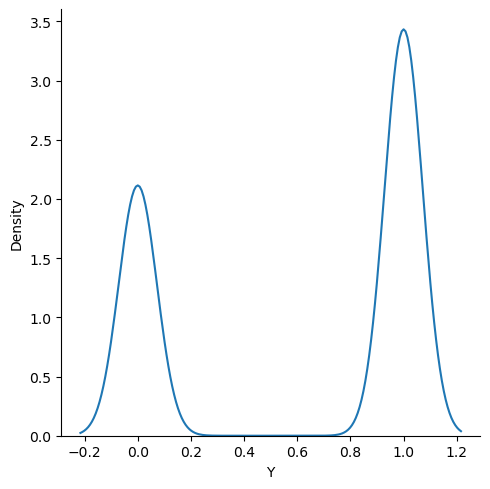

In [18]:
# Visualize `Y` as a continuous variable using a denisty plot
sns.displot(data=lf, x='Y', kind='kde', common_norm=False)

plt.show()

The density plot for `Y` shows there is a higher density of `1` values than `0`.

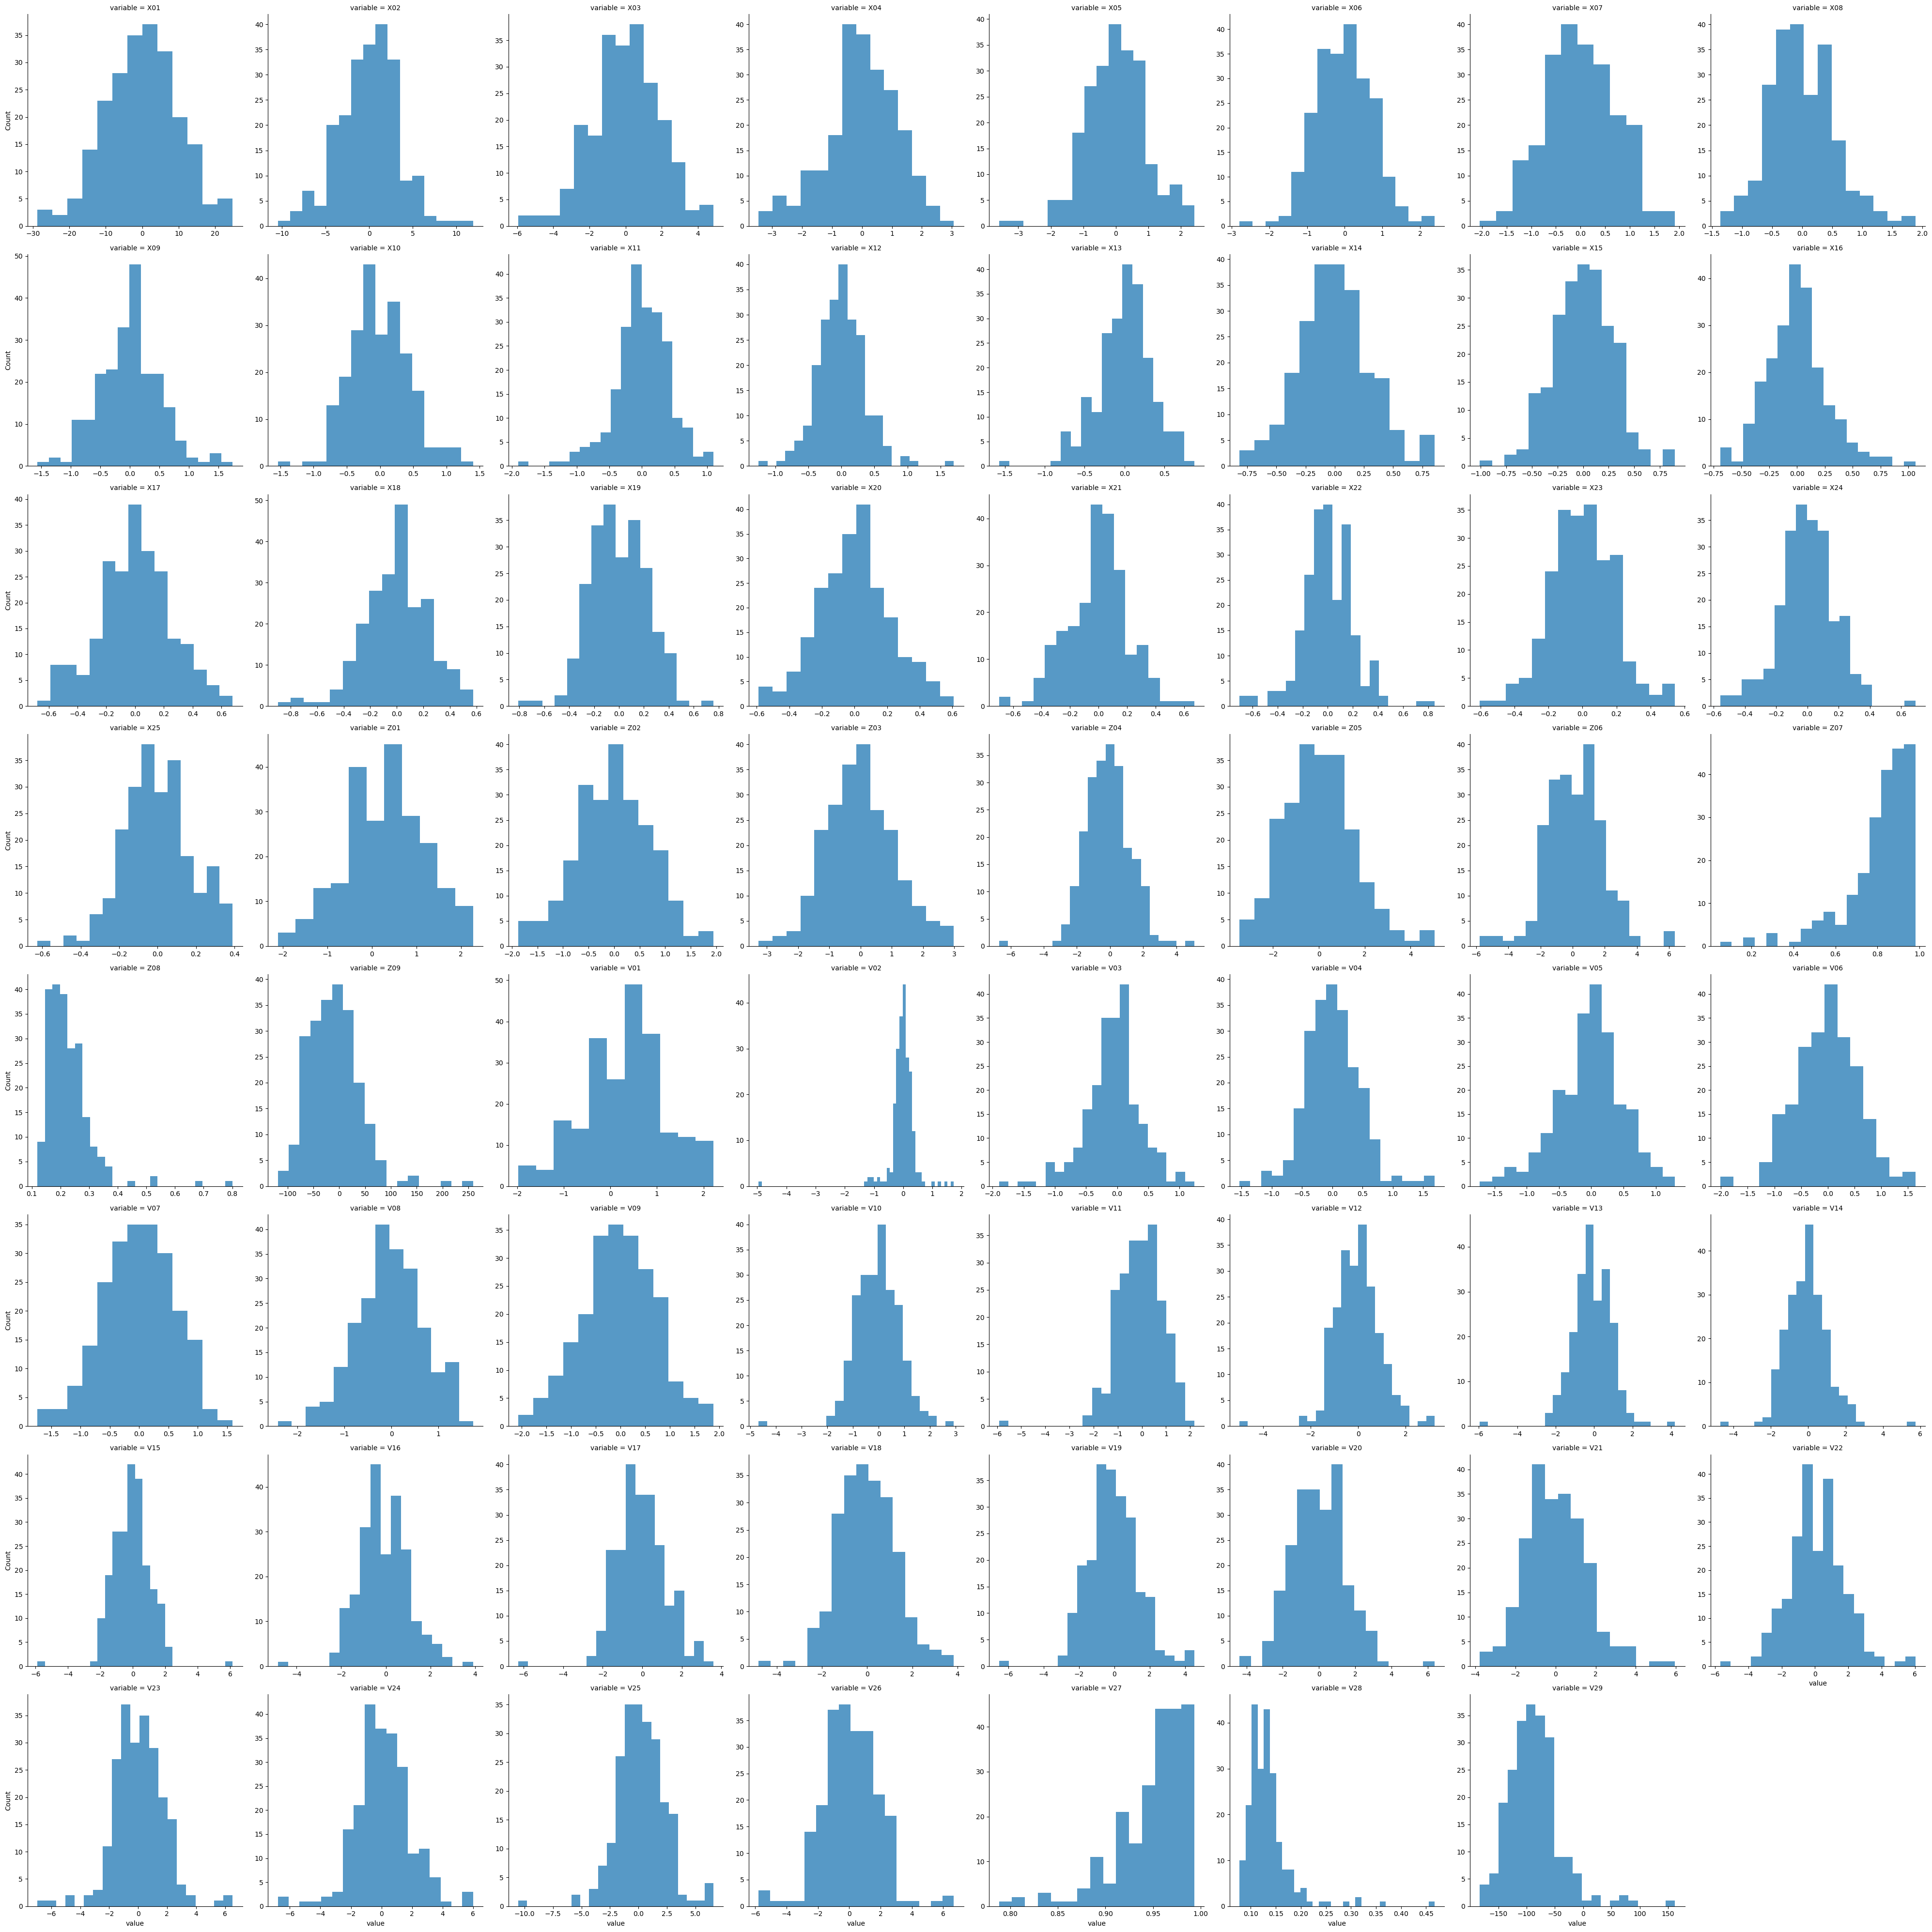

In [19]:
# Visualize all of the input variables using faceted histograms
sns.displot(data=lf, x='value', col='variable', kind='hist',\
col_wrap=8, facet_kws={'sharex': False, 'sharey': False},\
common_bins=False)

plt.show()

Most of the input distributions show symmetry. Some subplot shapes appear Gaussian (bell-like), with the majority of the data counts in the center. However, there are a few that appear to be skewed to the left or right.

Let's change the number of facets per column and add the `Kernal Density Estimate (KDE)` to get a closer look at the symmetry of the input distributions.

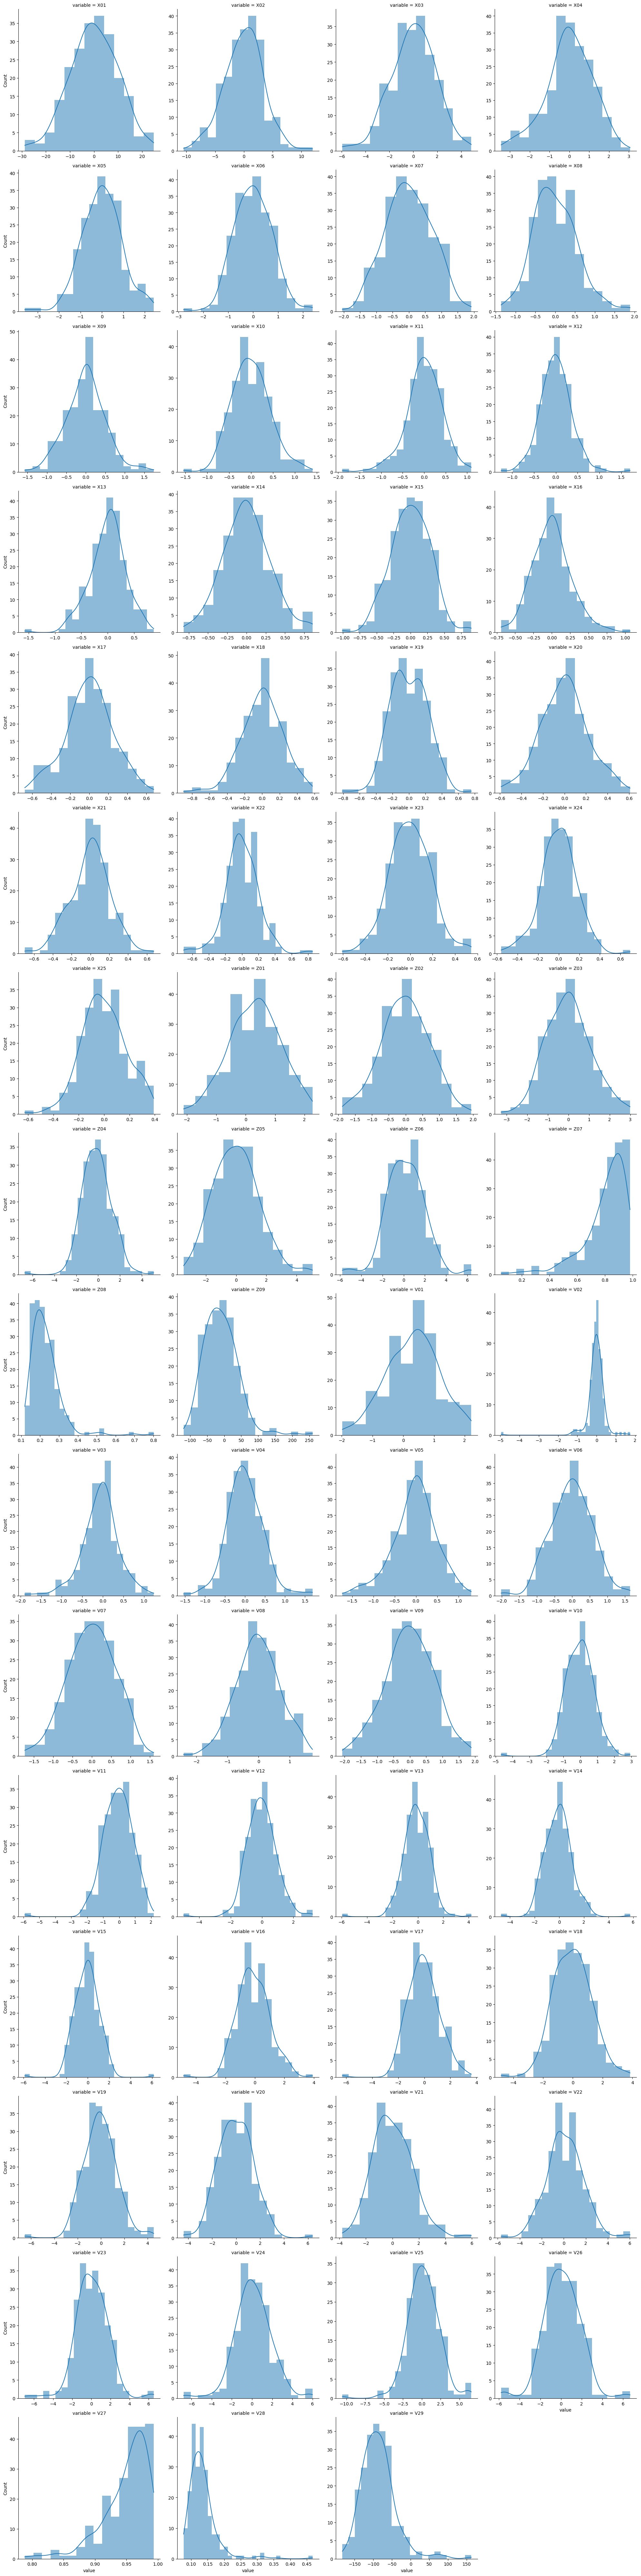

In [20]:
# Visualize the input distributions with KDE
sns.displot(data=lf, x='value', col='variable', kind='hist', kde=True,\
col_wrap=4, facet_kws={'sharex': False, 'sharey': False},\
common_bins=False)

plt.show()

### Visualize Relationships

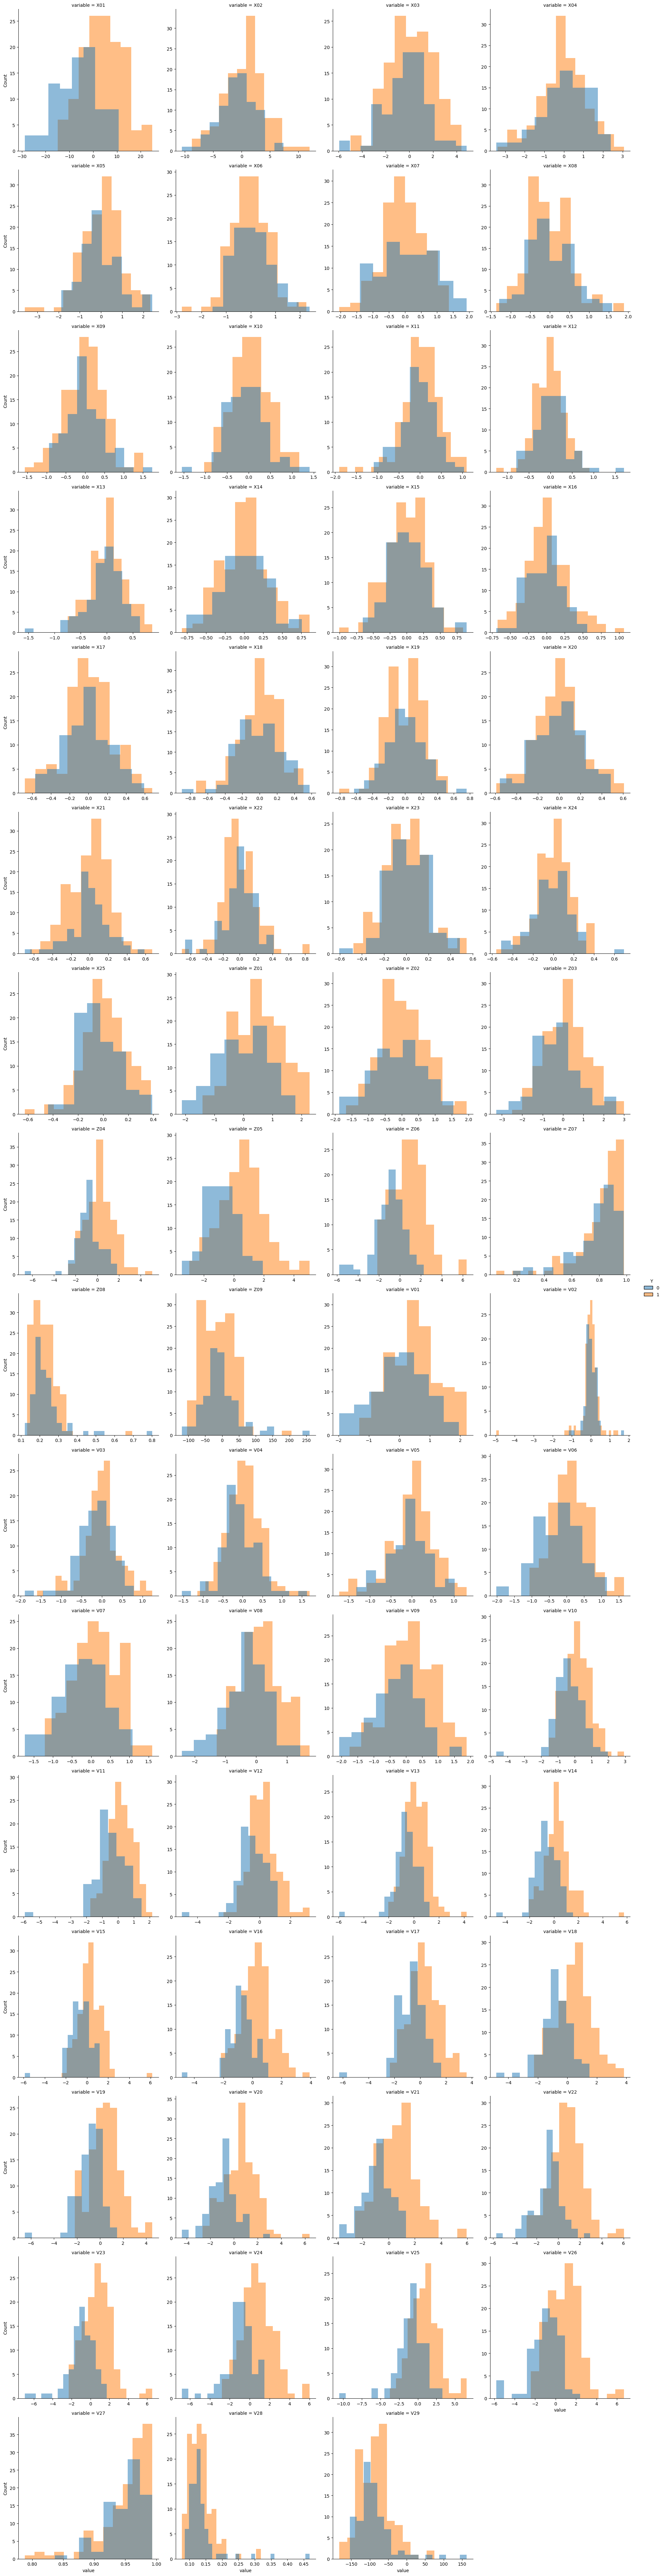

In [27]:
# Visualize the marginal distribution of the input variables grouped by the output variable
sns.displot(data=lf, x='value', col='variable', hue='Y', kind='hist',\
col_wrap=4, facet_kws={'sharex': False, 'sharey': False},\
common_bins=False)

plt.show()

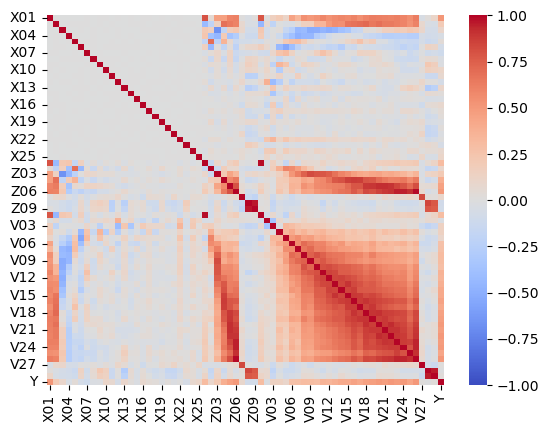

In [28]:
# Visualize the correclation of the numeric columns using a heatmap
fig, ax = plt.subplots()

sns.heatmap(data=df.corr(), vmin=-1, vmax=1, center=0,
            cmap='coolwarm', ax=ax)

plt.show()

The heat map shows us that there is a `high correlation` between all of the numeric variables.

Let's separate all of the `X`, `Z`, and `V` inputs and use a heatmap to see if there is a correlation between the smaller subsets of input variables.

In [29]:
# Create a DataFrame with just the `X` inputs
df_inputs_X = pd.DataFrame(df, columns=['X01', 'X02', 'X03', 'X04', 'X05',\
                                        'X06', 'X07', 'X08', 'X09', 'X10',\
                                        'X11', 'X12', 'X13', 'X14', 'X15',\
                                        'X16', 'X17', 'X18', 'X19', 'X20',\
                                        'X21', 'X22', 'X23', 'X24', 'X25'])

In [30]:
# Create a DataFrame with just the `Z` inputs
df_inputs_Z = pd.DataFrame(df, columns=['Z01', 'Z02', 'Z03', 'Z04', 'Z05',\
                                        'Z06', 'Z07', 'Z08', 'Z09'])

In [31]:
# Create a DataFrame with just the `V` inputs
df_inputs_V = pd.DataFrame(df, columns=['V01', 'V02', 'V03', 'V04', 'V05',\
                                        'V06', 'V07', 'V08', 'V09', 'V10',\
                                        'V11', 'V12', 'V13', 'V14', 'V15',\
                                        'V16', 'V17', 'V18', 'V19', 'V20',\
                                        'V21', 'V22', 'V23', 'V24', 'V25',\
                                        'V26', 'V27', 'V28', 'V29'])

In [32]:
# Group the `X` and `Z` inputs
df_group_X_Z = pd.concat([df_inputs_X, df_inputs_Z], axis=1)

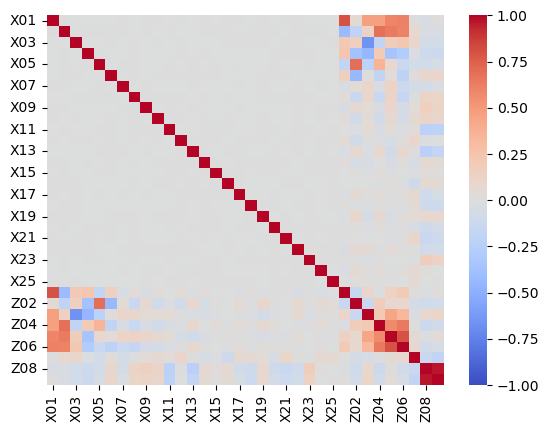

In [33]:
# Visualize the correlation between the `X` and `Z` inputs
fig, ax = plt.subplots()

sns.heatmap(data=df_group_X_Z.corr(), vmin=-1, vmax=1, center=0,
            cmap='coolwarm', ax=ax)

plt.show()

In [34]:
# Group the `X` and `V` inputs
df_group_X_V = pd.concat([df_inputs_X, df_inputs_V], axis=1)

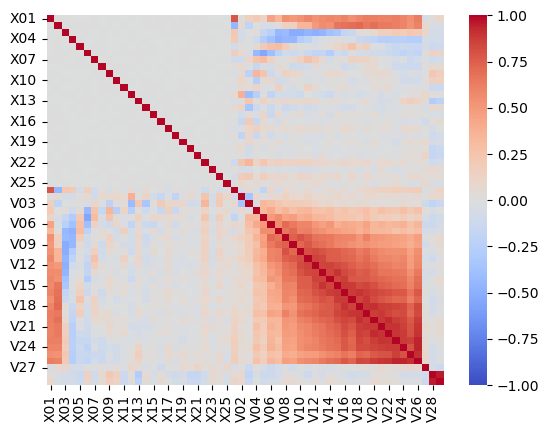

In [35]:
# Visualize the correlation between the `X` and `V` inputs
fig, ax = plt.subplots()

sns.heatmap(data=df_group_X_V.corr(), vmin=-1, vmax=1, center=0,
            cmap='coolwarm', ax=ax)

plt.show()

In [36]:
# Group the `Z` and `V` inputs
df_group_Z_V = pd.concat([df_inputs_Z, df_inputs_V], axis=1)

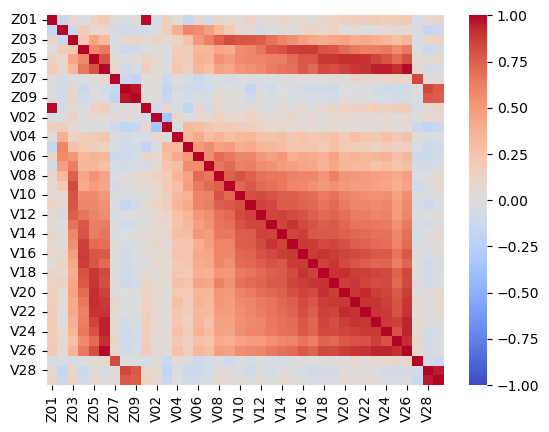

In [37]:
# Visualize the correlation between the `Z` and `V` inputs
fig, ax = plt.subplots()

sns.heatmap(data=df_group_Z_V.corr(), vmin=-1, vmax=1, center=0,
            cmap='coolwarm', ax=ax)

plt.show()

We can see that there is also a `high correlation` between the subgroups.

In [38]:
# Combine the inputs and Y output data
df_inputs_ZY = pd.concat([df_inputs_Z, df.Y], axis=1)
df_inputs_XY = pd.concat([df_inputs_X, df.Y], axis=1)
df_inputs_VY = pd.concat([df_inputs_V, df.Y], axis=1)

In [39]:
# Get list of input column names
z_input_names = df_inputs_Z.columns
x_input_names = df_inputs_X.columns
v_input_names = df_inputs_V.columns

In [40]:
# Melt the inputs and Y output into separate objects for easier visualization
lf_inputs_ZY = df_inputs_ZY.copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'Y'], value_vars=z_input_names, ignore_index=True)

In [41]:
lf_inputs_XY = df_inputs_XY.copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'Y'], value_vars=x_input_names, ignore_index=True)

In [42]:
lf_inputs_VY = df_inputs_VY.copy().\
reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'Y'], value_vars=v_input_names, ignore_index=True)

In [43]:
df_inputs_X

X01       X02       X03       X04       X05       X06       X07  \
0    -2.907070  1.266914 -0.332039 -0.248782  0.200432 -0.008683  0.316866   
1    -4.608052  4.672474  0.154697  0.268719 -0.842417  0.055191  0.622848   
2     4.338816  5.684974  1.868370 -1.883006  0.589758  0.932240 -0.646026   
3    -1.835062  0.427501 -2.226023  0.700375 -1.144850  1.188100  0.727831   
4    13.990969 -3.877269  1.921605  0.162288  2.316402 -0.161137 -0.099180   
..         ...       ...       ...       ...       ...       ...       ...   
218  -3.454719 -0.911378  1.072785  0.845129  1.817682 -0.034388 -0.394277   
219   0.493271  2.184699  0.107755 -1.852857  0.329977  0.679100  0.933463   
220  -5.009510 -0.488819  0.838883  0.615571  0.069954 -0.365945 -0.290072   
221  -2.665672 -0.546497 -0.545406 -0.477273  1.476238 -0.019403  0.280312   
222   0.055307 -1.709225 -0.763259 -0.755982 -0.106586 -1.174575 -0.608212   

          X08       X09       X10  ...       X16       X17       X18  \
0   -0.323924  0.030199 -0.205569  ...  0.200638 -0.178677 -0.326755   
1   -0.260097 -0.651079  1.096821  ... -0.475599 -0.134520 -0.028454   
2    0.183410  0.132287 -0.426386  ... -0.212595  0.156976  0.018543   
3   -0.271734  0.003246  0.138308  ... -0.028475  0.096027 -0.123256   
4    0.514620 -0.551956 -0.517779  ...  0.788743 -0.254506  0.491214   
..        ...       ...       ...  ...       ...       ...       ...   
218 -0.260803  0.018067 -0.718457  ... -0.309446  0.038568 -0.236641   
219  0.110013  0.234102 -0.080677  ... -0.063035  0.059436  0.043737   
220  0.777958 -0.392741  0.126245  ... -0.020948 -0.109336  0.275264   
221  0.359992 -0.136810  0.116397  ...  0.067161  0.018094 -0.010453   
222 -0.483285 -0.055759 -0.658711  ...  0.074124  0.098653  0.253909   

          X19       X20       X21       X22       X23       X24       X25  
0   -0.290914 -0.195717 -0.282860  0.114561  0.078453 -0.283316  0.260767  
1    0.046343 -0.034483  0.115162  0.852409 -0.244856  0.381449  0.089498  
2    0.232822  0.075627  0.175366 -0.191146 -0.380527  0.104869  0.003818  
3    0.176861 -0.140099 -0.297616 -0.146986 -0.056733  0.169253  0.081276  
4   -0.233248 -0.402587  0.181917 -0.396423 -0.158062  0.245597 -0.287934  
..        ...       ...       ...       ...       ...       ...       ...  
218  0.191243 -0.454833  0.023163  0.166585 -0.247597 -0.016248  0.116668  
219  0.046217  0.148321  0.203961  0.144056  0.190312  0.060799 -0.079069  
220 -0.251380  0.218547  0.101458  0.078319 -0.006770  0.055545 -0.207874  
221 -0.148546  0.229673 -0.246885 -0.048962 -0.165334  0.083707  0.040275  
222  0.060039  0.065909  0.009605 -0.115789 -0.237817  0.132530  0.302539  

[223 rows x 25 columns]

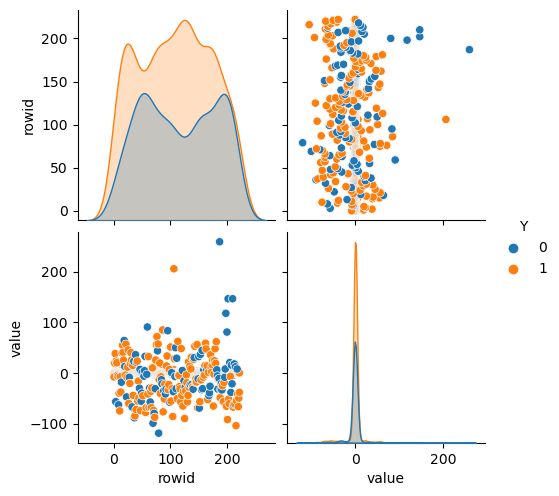

In [44]:
# Visualize the relationship between the `Z-named` inputs and `Y`
sns.pairplot(data = lf_inputs_ZY, hue='Y')

plt.show()

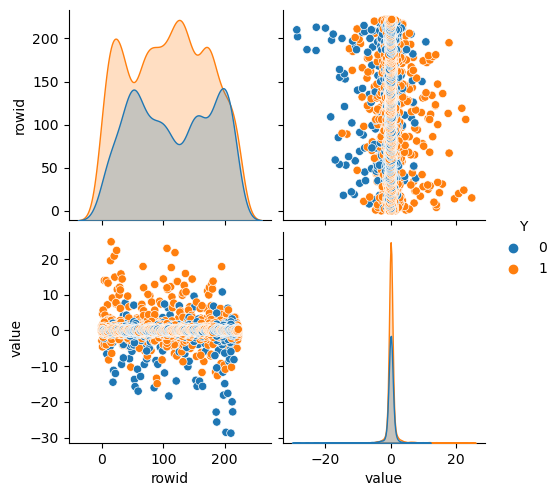

In [45]:
# Visualize the relationship between the `X-named` inputs and `Y`
sns.pairplot(data = lf_inputs_XY, hue='Y')

plt.show()

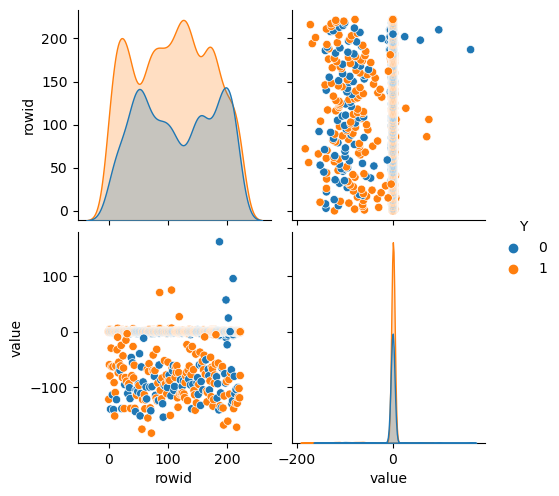

In [46]:
# Visualize the relationship between the `V-named` inputs and `Y`
sns.pairplot(data = lf_inputs_VY, hue='Y')

plt.show()

##### Conditional Distribtuions

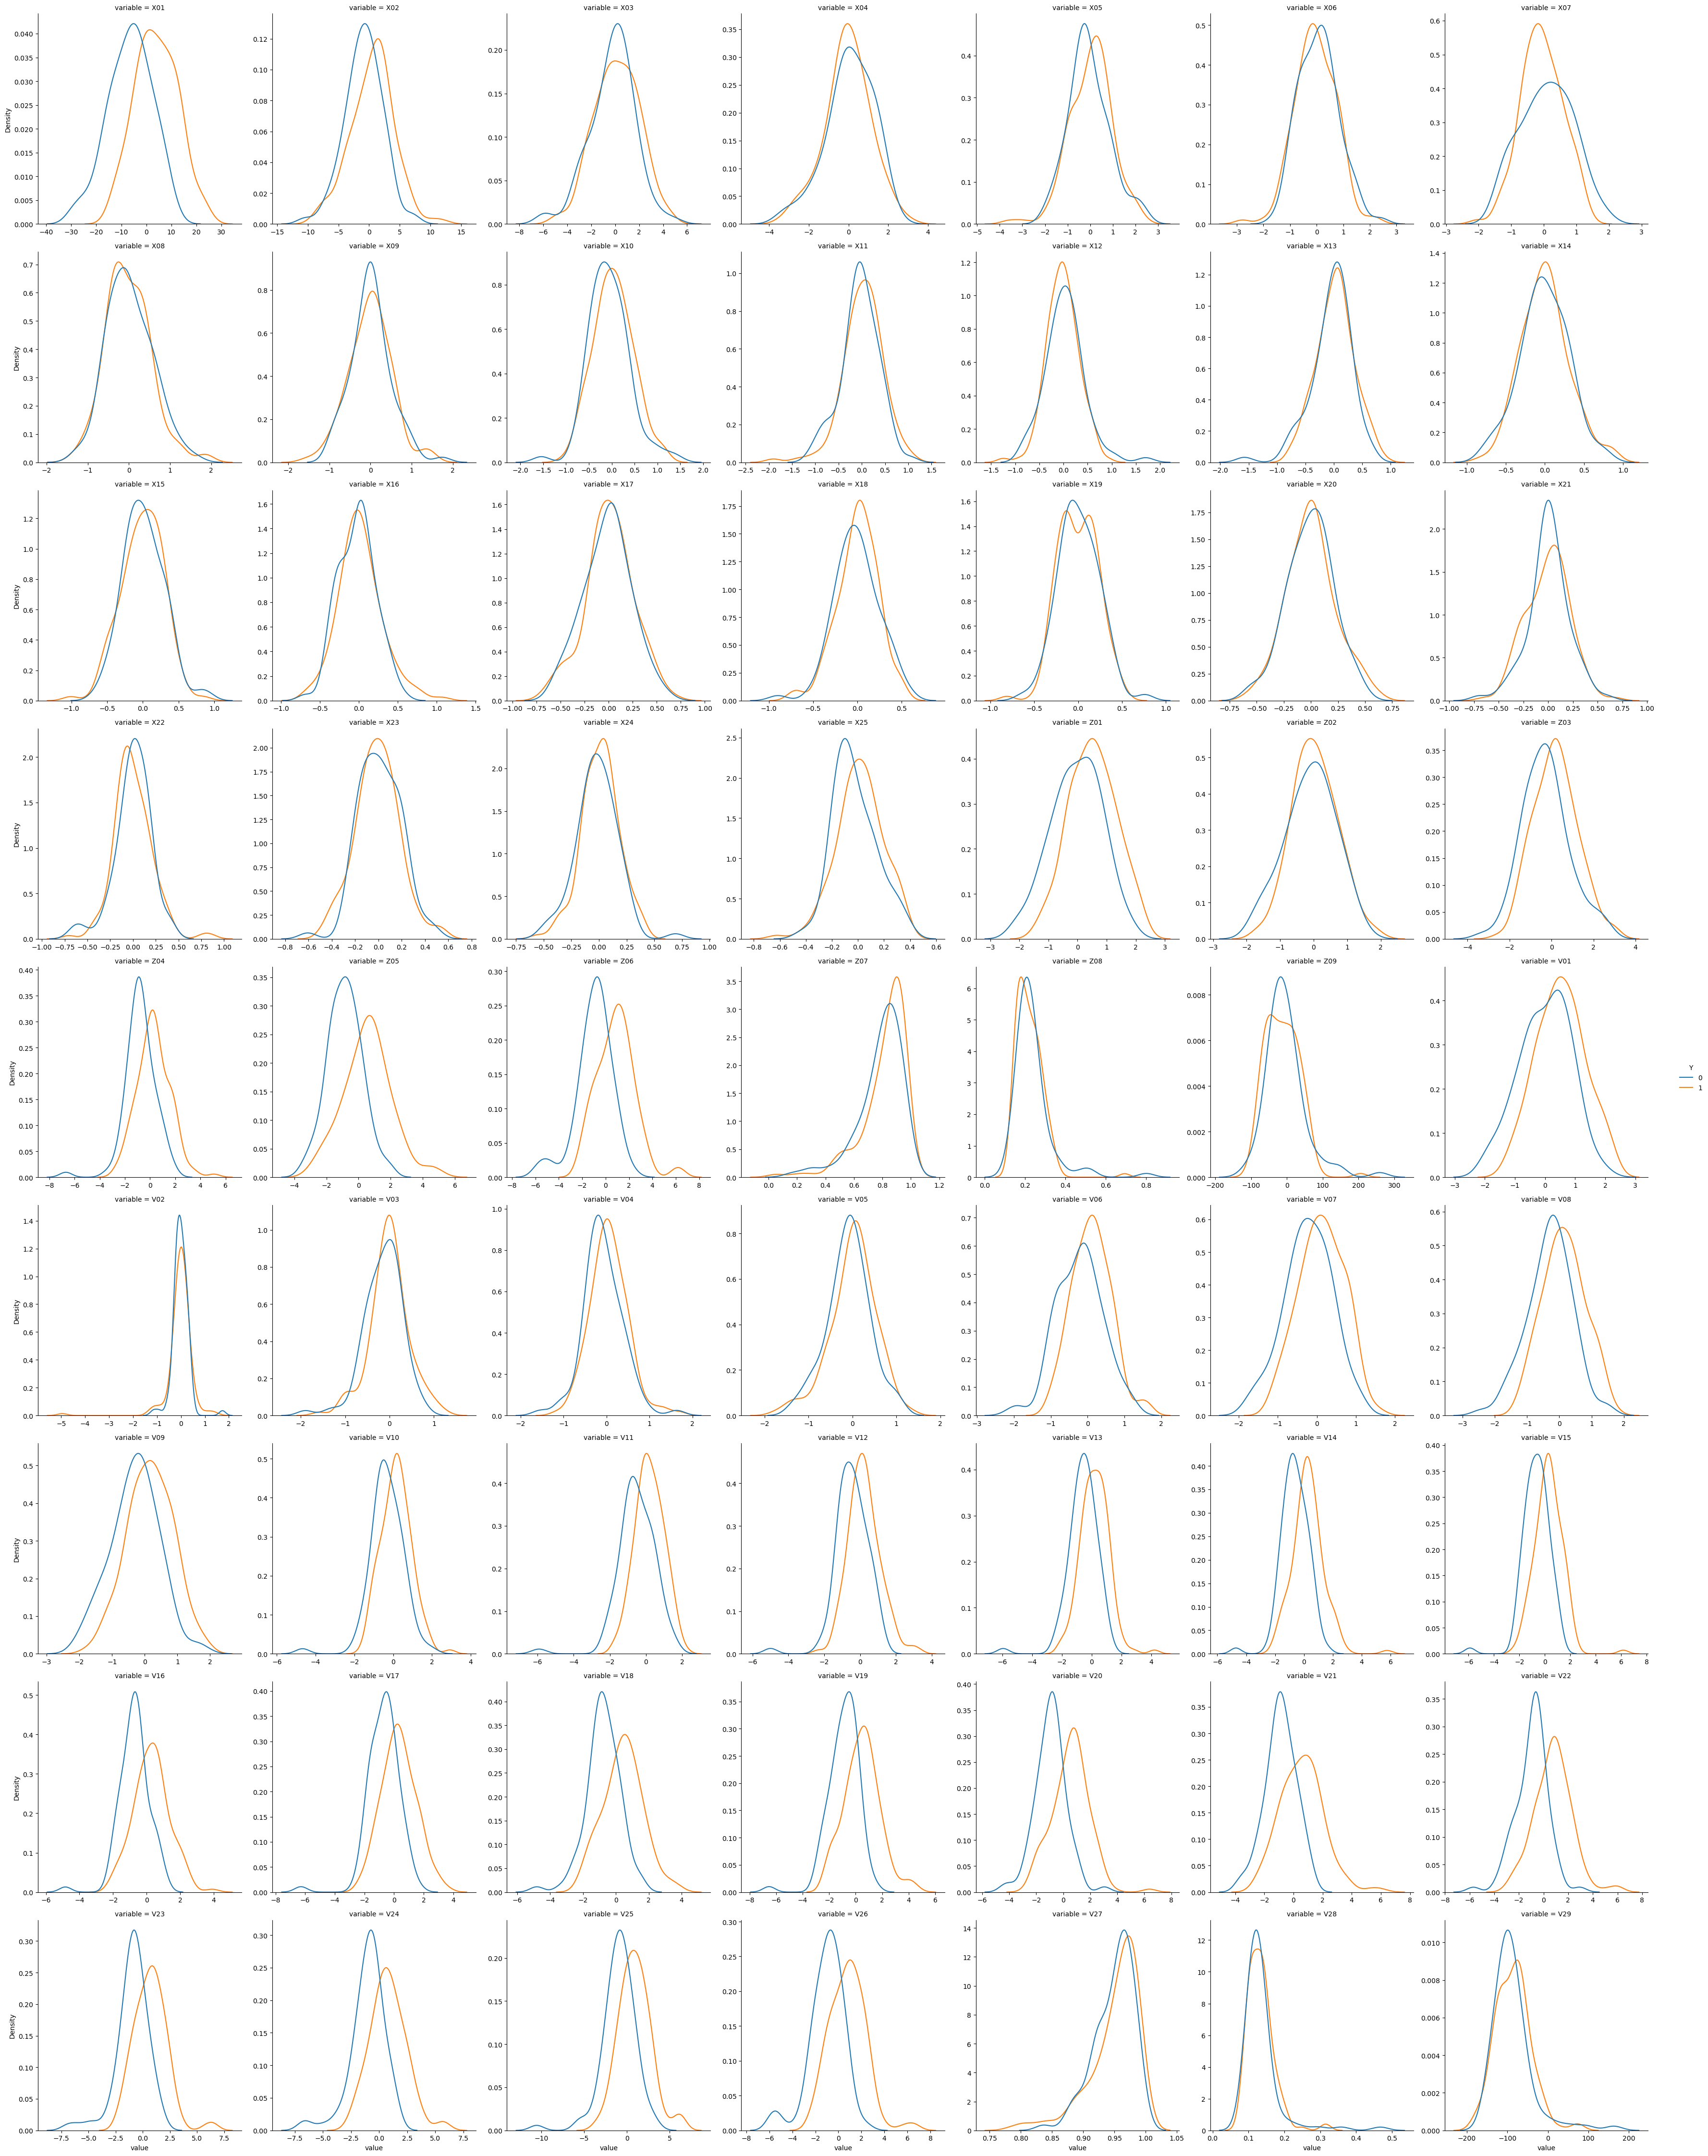

In [47]:
# Visualize the conditional KDE for input variables where we color by ouput
sns.displot(data=lf, x='value', col='variable', hue='Y', kind='kde',\
col_wrap=7, facet_kws={'sharex': False, 'sharey': False},\
common_norm=False)

plt.show()

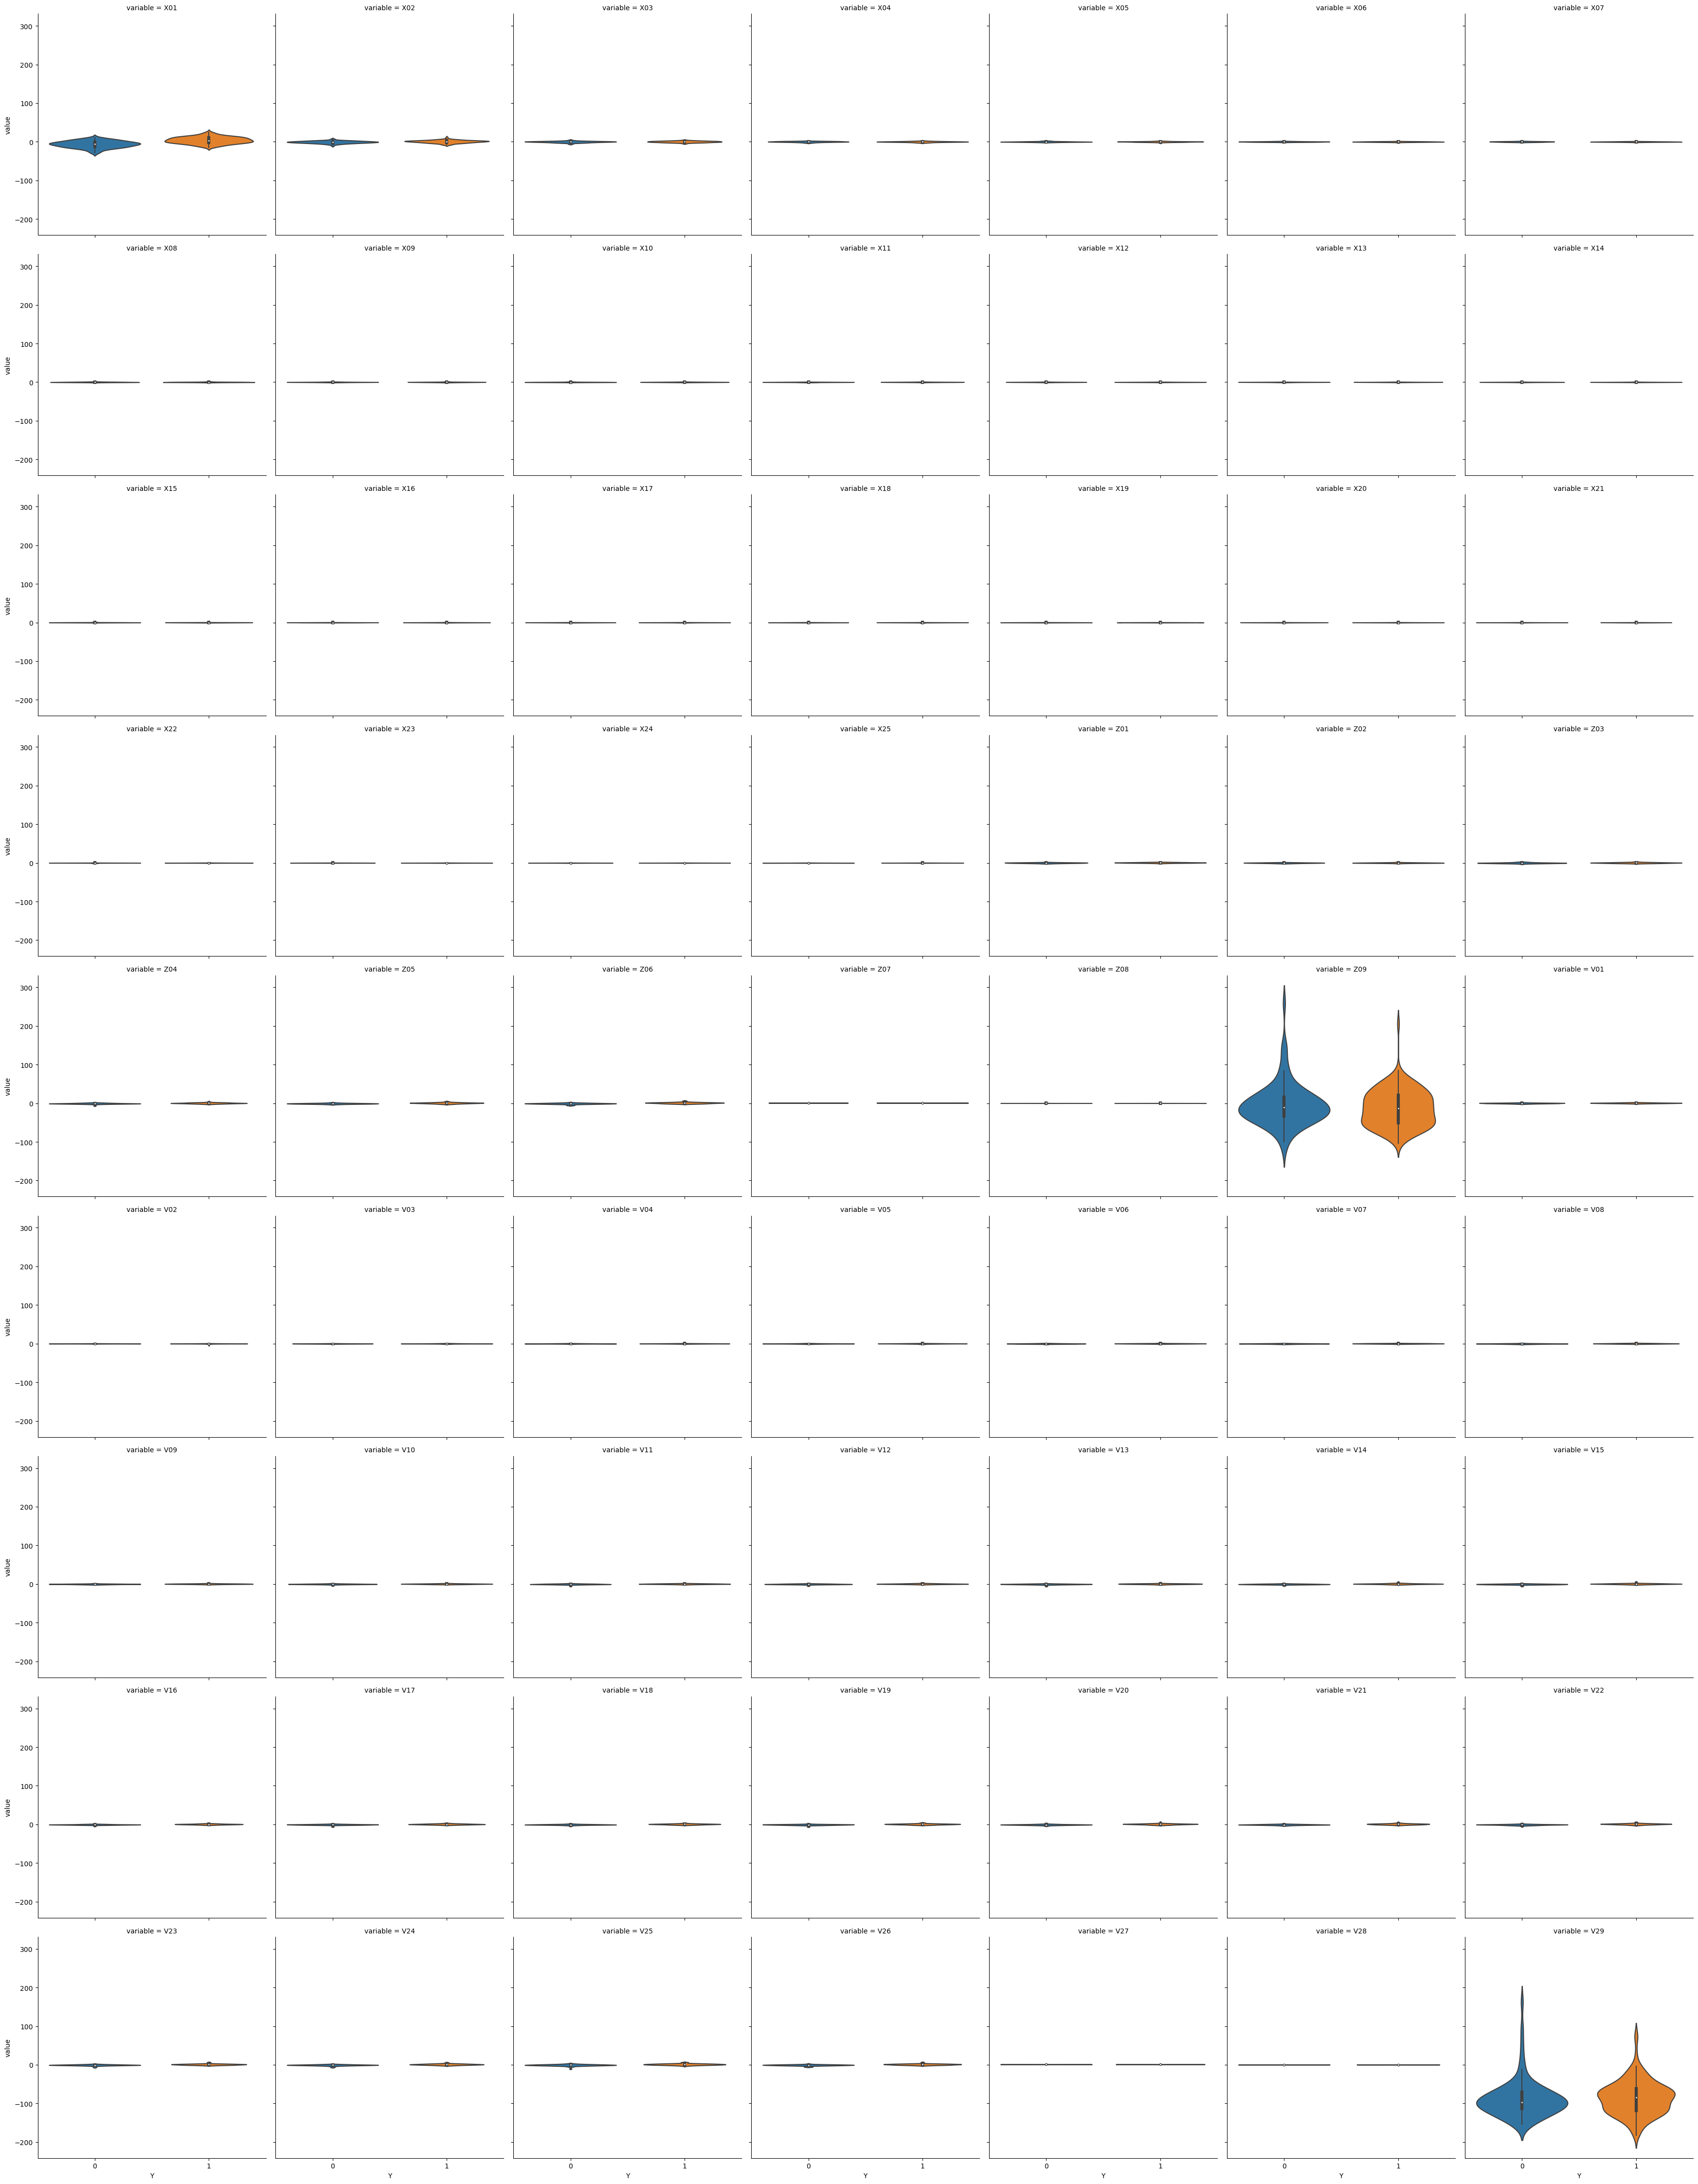

In [48]:
# Use a violin plot to compare the conditional distribution shapes
sns.catplot(data=lf, x='Y', y='value', col='variable', kind='violin',\
col_wrap=7, facet_kws={'sharex': False, 'sharey': False},\
common_norm=False)

plt.show()

The violin plot shows that variables `X01`, `Z09`, and `V29` have a greater distribution of observations for `Y`.

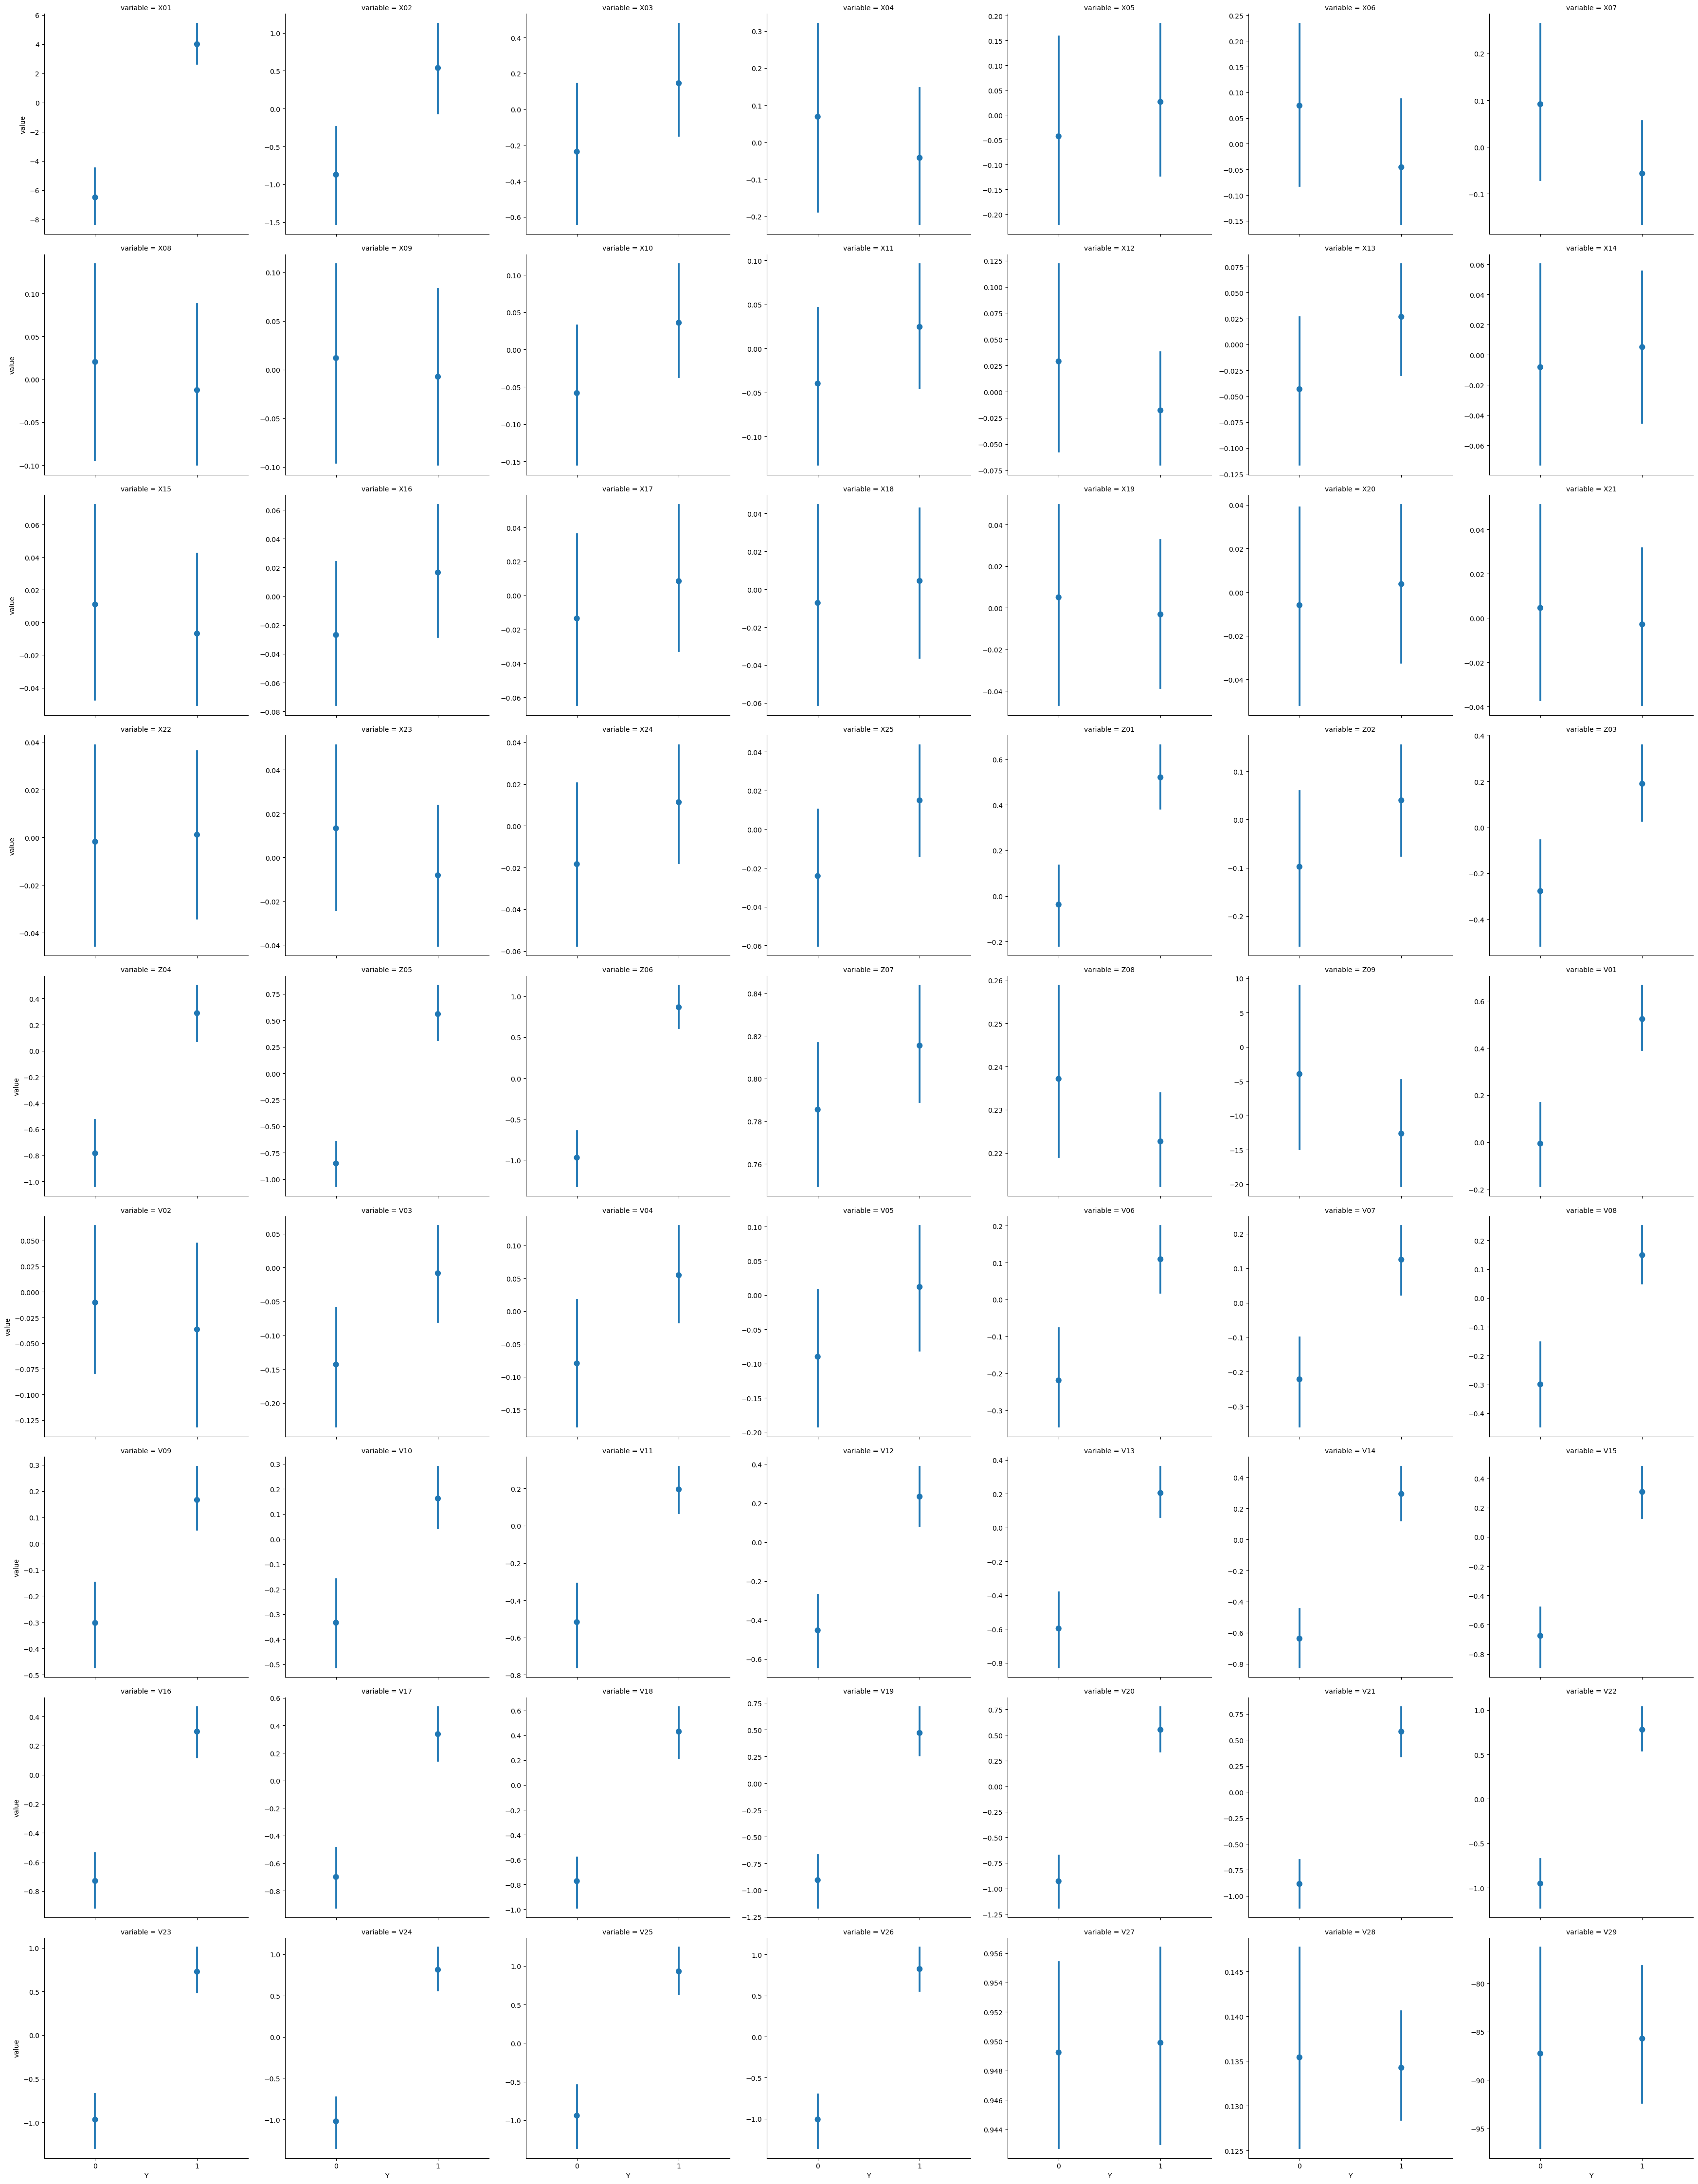

In [49]:
# Visualize the conditional means using a point plot 
sns.catplot(data=lf, x='Y', y='value', col='variable', kind='point',\
    col_wrap=7, join=False, sharey=False)

plt.show()

Let's use a boxplot to visualize how the median changes across the input data. This will help us to determine if the scales and magnitutes are consistent.

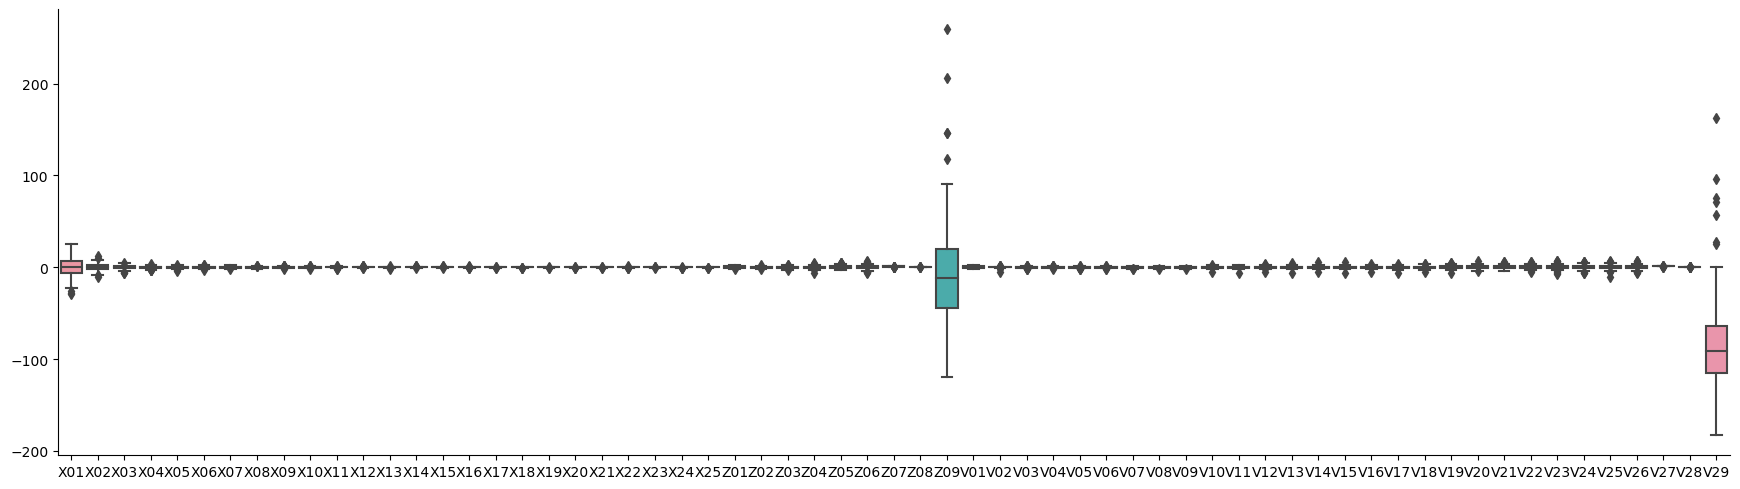

In [50]:
# Visualize a box plot of the input data
sns.catplot(data=df_inputs, kind='box', aspect=3.5)

plt.show()

The box plot shows us that there are some inputs that have a higher magnitude, such as `V29`, `Z09`, and `X01`.

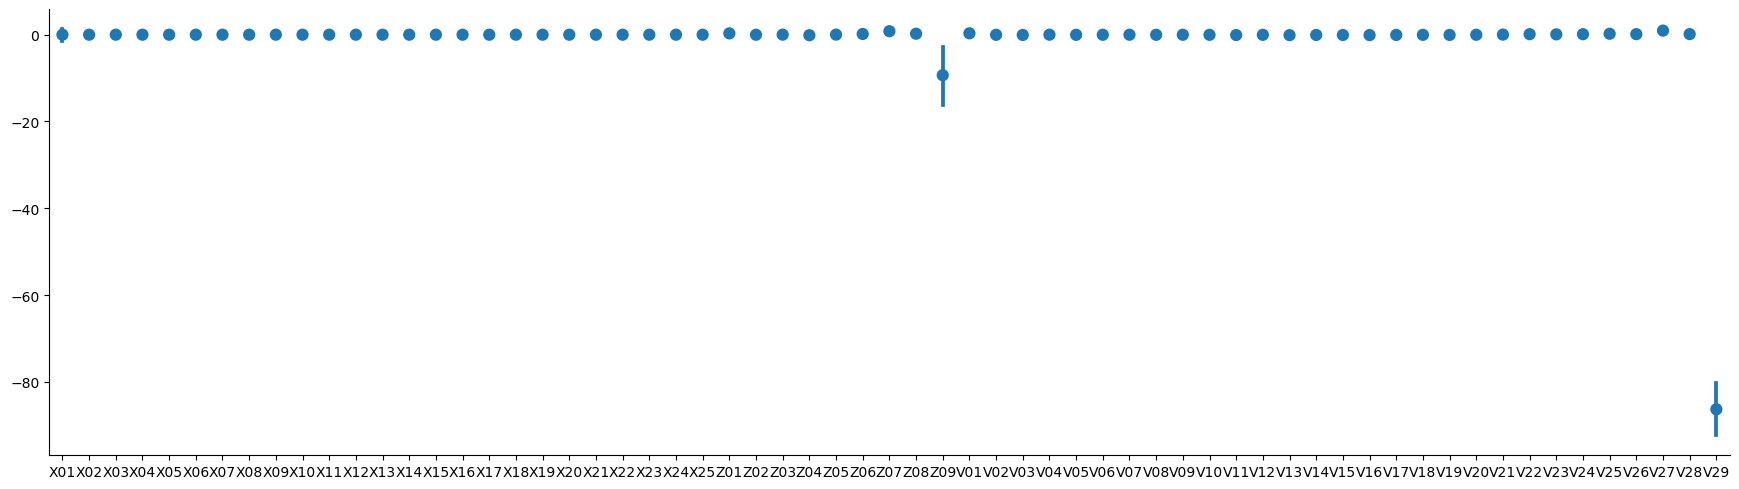

In [51]:
# Visualize the input data with a point plot
sns.catplot(data=df_inputs, kind='point', join=False, aspect=3.5)

plt.show()

Let's display a box plot using the long format of the data, but group by the output `Y`.

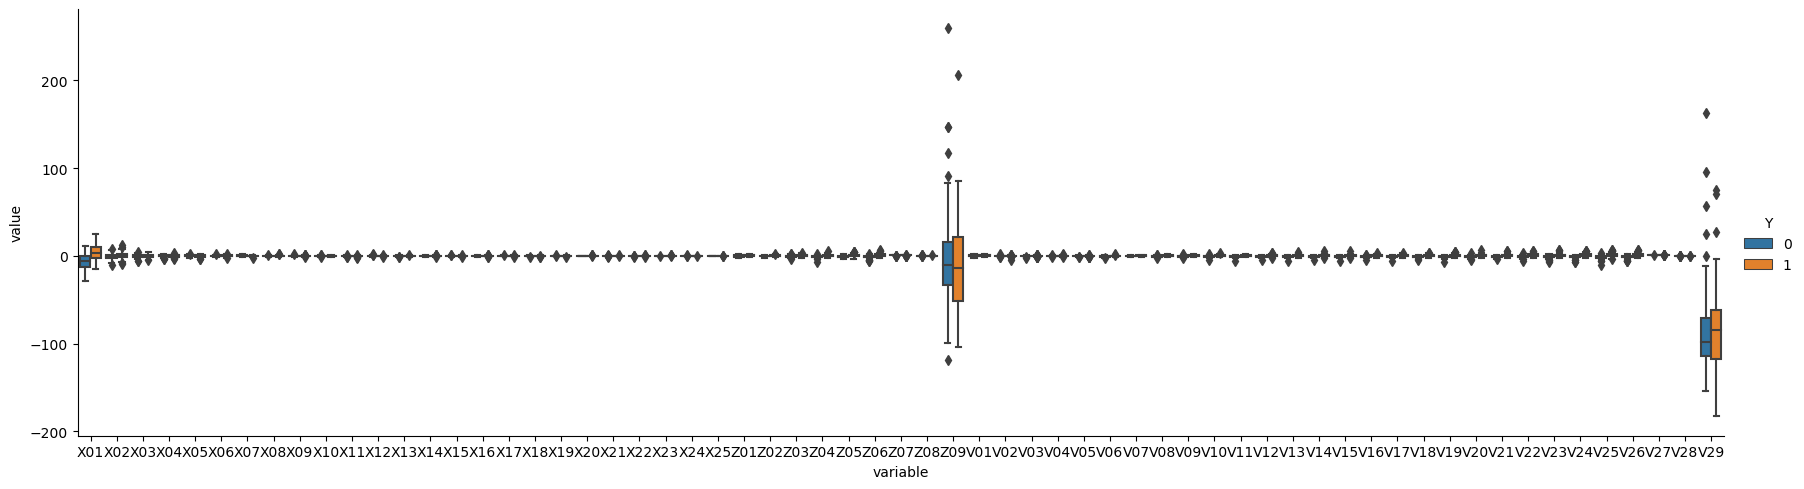

In [52]:
# Visualize a box plot of the input data grouped by Y
sns.catplot(data=lf, x='variable', y='value', hue='Y', kind='box', aspect=3.5)

plt.show()

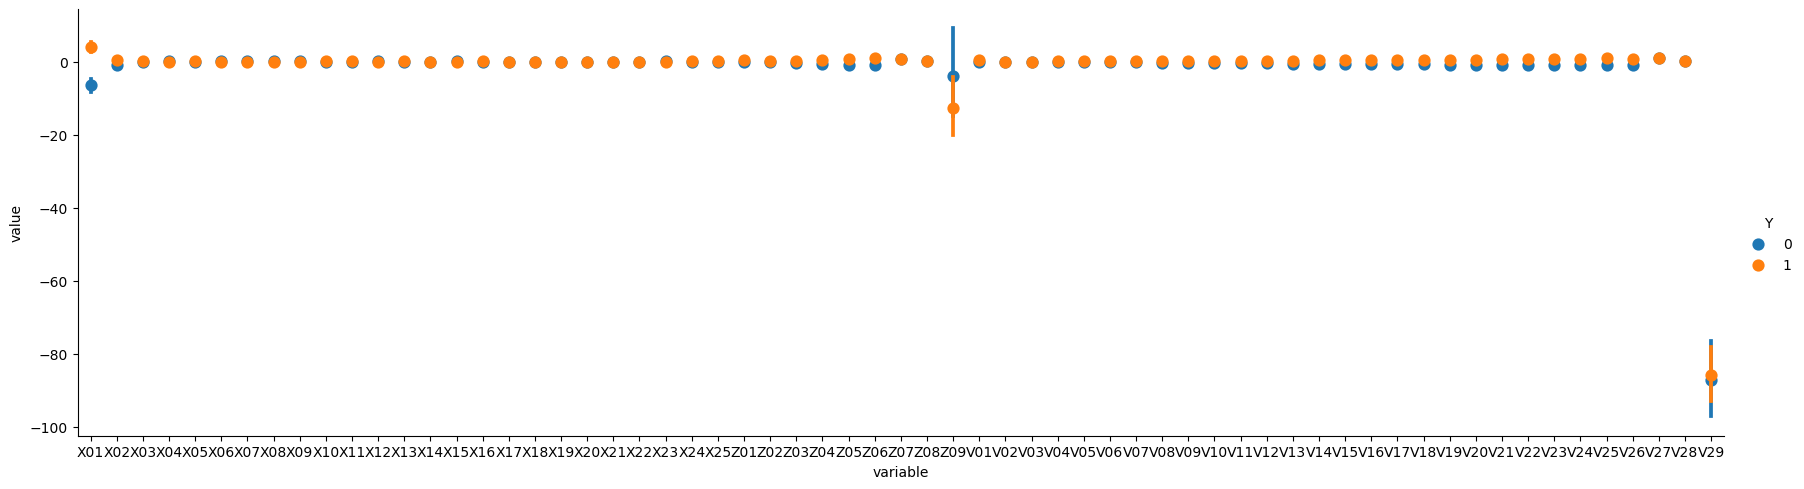

In [53]:
# Visualize the conditional means using a point plot given Y 
sns.catplot(data=lf, x='variable', y='value', hue='Y', kind='point',\
    join=False, aspect=3.5)

plt.show()

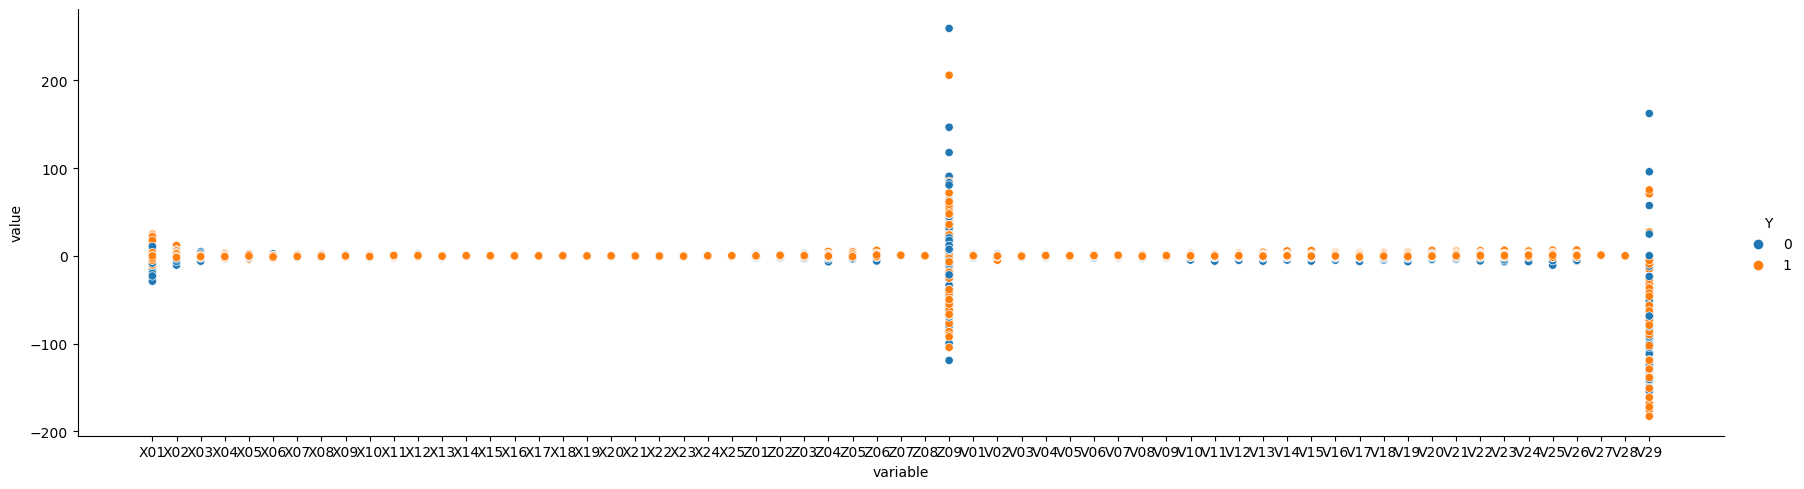

In [54]:
sns.relplot(data=lf, x='variable', y='value', hue='Y', aspect=3.5)

plt.show()